In [ ]:
# Based on: https://www.tensorflow.org/hub/tutorials/tf2_image_retraining?hl=pt-br

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
print('TensorFlow version: ', tf.__version__)
print('TensorFlow Hub version: ', hub.__version__)

TensorFlow version:  2.15.0
TensorFlow Hub version:  0.15.0


## Setting the model

In [ ]:
# Other models: https://tfhub.dev/s?module-type=image-feature-vector&tf-version=tf2
model_name = 'efficientnetv2-xl-21k' # @param ['efficientnetv2-s', 'efficientnetv2-m', 'efficientnetv2-l', 'efficientnetv2-s-21k', 'efficientnetv2-m-21k', 'efficientnetv2-l-21k', 'efficientnetv2-xl-21k', 'efficientnetv2-b0-21k', 'efficientnetv2-b1-21k', 'efficientnetv2-b2-21k', 'efficientnetv2-b3-21k', 'efficientnetv2-s-21k-ft1k', 'efficientnetv2-m-21k-ft1k', 'efficientnetv2-l-21k-ft1k', 'efficientnetv2-xl-21k-ft1k', 'efficientnetv2-b0-21k-ft1k', 'efficientnetv2-b1-21k-ft1k', 'efficientnetv2-b2-21k-ft1k', 'efficientnetv2-b3-21k-ft1k', 'efficientnetv2-b0', 'efficientnetv2-b1', 'efficientnetv2-b2', 'efficientnetv2-b3', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'bit_s-r50x1', 'inception_v3', 'inception_resnet_v2', 'resnet_v1_50', 'resnet_v1_101', 'resnet_v1_152', 'resnet_v2_50', 'resnet_v2_101', 'resnet_v2_152', 'nasnet_large', 'nasnet_mobile', 'pnasnet_large', 'mobilenet_v2_100_224', 'mobilenet_v2_130_224', 'mobilenet_v2_140_224', 'mobilenet_v3_small_100_224', 'mobilenet_v3_small_075_224', 'mobilenet_v3_large_100_224', 'mobilenet_v3_large_075_224']

In [ ]:
models_path = {
  "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/2",
  "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/feature_vector/2",
  "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/feature_vector/2",
  "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/2",
  "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/feature_vector/2",
  "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/feature_vector/2",
  "efficientnetv2-xl-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2",
  "efficientnetv2-b0-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/feature_vector/2",
  "efficientnetv2-b1-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b1/feature_vector/2",
  "efficientnetv2-b2-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b2/feature_vector/2",
  "efficientnetv2-b3-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b3/feature_vector/2",
  "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/feature_vector/2",
  "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/feature_vector/2",
  "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/feature_vector/2",
  "efficientnetv2-xl-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_xl/feature_vector/2",
  "efficientnetv2-b0-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/feature_vector/2",
  "efficientnetv2-b1-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b1/feature_vector/2",
  "efficientnetv2-b2-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b2/feature_vector/2",
  "efficientnetv2-b3-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b3/feature_vector/2",
  "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2",
  "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/feature_vector/2",
  "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/feature_vector/2",
  "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/feature_vector/2",
  "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
  "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1",
  "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1",
  "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1",
  "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
  "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1",
  "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1",
  "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
  "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/1",
  "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/feature-vector/4",
  "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature-vector/4",
  "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/feature-vector/4",
  "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/feature-vector/4",
  "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/feature-vector/4",
  "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/feature-vector/4",
  "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/feature-vector/4",
  "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/feature-vector/4",
  "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4",
  "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4",
  "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4",
  "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4",
  "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4",
  "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
  "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5",
  "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/feature_vector/5",
  "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5",
  "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5",
}

In [ ]:
models_pixels = {
  "efficientnetv2-s": 384,
  "efficientnetv2-m": 480,
  "efficientnetv2-l": 480,
  "efficientnetv2-b0": 224,
  "efficientnetv2-b1": 240,
  "efficientnetv2-b2": 260,
  "efficientnetv2-b3": 300,
  "efficientnetv2-s-21k": 384,
  "efficientnetv2-m-21k": 480,
  "efficientnetv2-l-21k": 480,
  "efficientnetv2-xl-21k": 512,
  "efficientnetv2-b0-21k": 224,
  "efficientnetv2-b1-21k": 240,
  "efficientnetv2-b2-21k": 260,
  "efficientnetv2-b3-21k": 300,
  "efficientnetv2-s-21k-ft1k": 384,
  "efficientnetv2-m-21k-ft1k": 480,
  "efficientnetv2-l-21k-ft1k": 480,
  "efficientnetv2-xl-21k-ft1k": 512,
  "efficientnetv2-b0-21k-ft1k": 224,
  "efficientnetv2-b1-21k-ft1k": 240,
  "efficientnetv2-b2-21k-ft1k": 260,
  "efficientnetv2-b3-21k-ft1k": 300,
  "efficientnet_b0": 224,
  "efficientnet_b1": 240,
  "efficientnet_b2": 260,
  "efficientnet_b3": 300,
  "efficientnet_b4": 380,
  "efficientnet_b5": 456,
  "efficientnet_b6": 528,
  "efficientnet_b7": 600,
  "inception_v3": 299,
  "inception_resnet_v2": 299,
  "nasnet_large": 331,
  "pnasnet_large": 331,
}

In [ ]:
model_path = models_path.get(model_name)
model_path

'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2'

In [ ]:
pixels = models_pixels.get(model_name)
pixels

512

In [ ]:
image_size = (pixels, pixels)
image_size

(512, 512)

In [ ]:
print('Model: ', model_name)
print('Path:', model_path)
print('Imagem size:', image_size)

Model:  efficientnetv2-xl-21k
Path: https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2
Imagem size: (512, 512)


# Dataset
- Kaggle: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
- TensorFlow: https://www.tensorflow.org/datasets/catalog/tf_flowers

In [ ]:
data_directory = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
     untar = True
)

228813984/228813984 [==============================] - 3s 0us/step


In [ ]:
data_directory

'/root/.keras/datasets/flower_photos'

# Training Dataset

In [ ]:
# tf.keras.utils.image_dataset_from_directory(
#     directory,
#     labels='inferred',
#     label_mode='int',
#     class_names=None,
#     color_mode='rgb',
#     batch_size=32,
#     image_size=(256, 256),
#     shuffle=True,
#     seed=None,
#     validation_split=None,
#     subset=None,
#     interpolation='bilinear',
#     follow_links=False,
#     crop_to_aspect_ratio=False,
# )

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_directory,
                                                                    validation_split = .20,
                                                                    subset = 'training',
                                                                    label_mode = 'categorical',
                                                                    seed = 123,
                                                                    image_size = image_size,
                                                                    batch_size = 1)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
2936 / 3670

0.8

In [ ]:
train_dataset.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
classes = train_dataset.class_names
classes

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
training_size = train_dataset.cardinality().numpy()
training_size

2936

In [ ]:
BATCH_SIZE = 16

In [ ]:
train_dataset = train_dataset.unbatch().batch(BATCH_SIZE)

In [ ]:
train_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [ ]:
2936 / 16

183.5

In [ ]:
16 * 183

2928

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/repeat
# https://stackoverflow.com/questions/53514495/what-does-batch-repeat-and-shuffle-do-with-tensorflow-dataset
# returns a tensor which has the same shape as input
# repeat([[1, 2], [3, 4]], repeats=[2, 3], axis=0)
# repeat(['a', 'b', 'c'], repeats=[3, 0, 2], axis=0)

train_dataset = train_dataset.repeat()

Neural Network + Image Augmentation

1. Image augmentation: https://www.tensorflow.org/tutorials/images/data_augmentation
2. https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip



In [ ]:
# IMG_SIZE = 180
# resize_and_rescale = tf.keras.Sequential([
#   layers.Resizing(IMG_SIZE, IMG_SIZE),
#   layers.Rescaling(1./255)
# ])
# Rescaling: Change the range of the value of image from (0-255) to (0-1)
# random rotation(angle); random translation(height,width)

normalization_layer = tf.keras.layers.Rescaling(1. / 255)
pre_processing = tf.keras.Sequential([normalization_layer]) #Before sending data to neural network(Sequential), we normalize the data by rescaling
pre_processing.add(tf.keras.layers.RandomRotation(40)) #40 degree angle
pre_processing.add(tf.keras.layers.RandomTranslation(0, 0.2))
pre_processing.add(tf.keras.layers.RandomTranslation(0.2, 0))
pre_processing.add(tf.keras.layers.RandomZoom(0.2, 0.2))
pre_processing.add(tf.keras.layers.RandomFlip(mode = 'horizontal'))

# Send the training data to sequential layer
1. pre_processing: the neural network layer
2. images: image files
3. labels: 5 categories

In [ ]:
train_dataset = train_dataset.map(lambda images, labels: (pre_processing(images), labels))
train_dataset

<_MapDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

# Testing Dataset

In [ ]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_directory,
                                                                 validation_split = .20,
                                                                 subset = 'validation',
                                                                 label_mode = 'categorical',
                                                                 seed = 123,
                                                                 image_size = image_size,
                                                                 batch_size = 1)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
# cardinality:  a measure of the number of elements of the set
# tf.data
test_size = test_dataset.cardinality()
test_size

<tf.Tensor: shape=(), dtype=int64, numpy=734>

In [ ]:
test_size = test_dataset.cardinality().numpy()
test_size

734

In [ ]:
test_dataset = test_dataset.unbatch().batch(BATCH_SIZE)
test_dataset = test_dataset.map(lambda images, labels: (pre_processing(images), labels))

# Building and train the neural network

In [ ]:
image_size

(512, 512)

In [ ]:
image_size + (3,)

(512, 512, 3)

In [ ]:
model_path

'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2'

In [ ]:
len(classes)

5

In [ ]:
# Dropout: https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf
model = tf.keras.Sequential([
                              tf.keras.layers.InputLayer(input_shape = image_size + (3,)), #input layer: Information of images
                              hub.KerasLayer(model_path, trainable = False), #Pass the images to pretrained model
                              tf.keras.layers.Dropout(rate = 0.2), # Dropout: Drop 20% of neurons in layers
                              tf.keras.layers.Dense(len(classes)) # Dense: Finally the output layer containing 5 neurons of 5 classes [without activation]
])

In [ ]:
(None, ) + image_size + (3,) # None parameter defines the number of images sent to neural network

(None, 512, 512, 3)

In [ ]:
model.build((None, ) + image_size + (3,))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              207615832 
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 207622237 (792.02 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 207615832 (791.99 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), #when activation func is not used, then results are not in form of probability, rather in form of logits
              metrics = ['accuracy'])

In [ ]:
steps_per_epoch = training_size // BATCH_SIZE
validation_steps = test_size // BATCH_SIZE
print(steps_per_epoch, validation_steps)

183 45


In [ ]:
hist = model.fit(train_dataset,
                 epochs = 5,
                 steps_per_epoch = steps_per_epoch,
                 validation_data = test_dataset,
                 validation_steps = validation_steps).history

# 183 batches per epoch will run

Epoch 1/5
183/183 [==============================] - 653s 3s/step - loss: 0.4773 - accuracy: 0.8344 - val_loss: 0.1693 - val_accuracy: 0.9472
Epoch 2/5
183/183 [==============================] - 611s 3s/step - loss: 0.1929 - accuracy: 0.9298 - val_loss: 0.1414 - val_accuracy: 0.9542
Epoch 3/5
183/183 [==============================] - 614s 3s/step - loss: 0.1450 - accuracy: 0.9479 - val_loss: 0.1275 - val_accuracy: 0.9556
Epoch 4/5
183/183 [==============================] - 599s 3s/step - loss: 0.1190 - accuracy: 0.9596 - val_loss: 0.1541 - val_accuracy: 0.9556
Epoch 5/5
183/183 [==============================] - 584s 3s/step - loss: 0.1122 - accuracy: 0.9579 - val_loss: 0.1229 - val_accuracy: 0.9681


In [ ]:
hist # accuracy and loss of Training and test dataset

{'loss': [0.47732803225517273,
  0.19289693236351013,
  0.145020991563797,
  0.11896335333585739,
  0.1122383400797844],
 'accuracy': [0.8343579173088074,
  0.9297945499420166,
  0.9479451775550842,
  0.9595890641212463,
  0.9578767418861389],
 'val_loss': [0.1692885458469391,
  0.1413966864347458,
  0.12750455737113953,
  0.15410293638706207,
  0.1229323297739029],
 'val_accuracy': [0.9472222328186035,
  0.9541666507720947,
  0.9555555582046509,
  0.9555555582046509,
  0.9680555462837219]}

Text(0.5, 0, 'Steps')

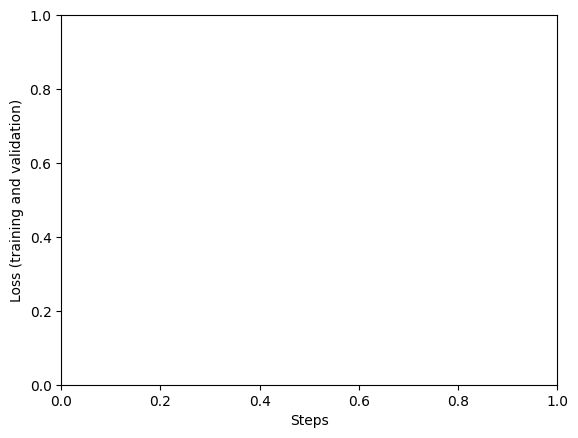

In [ ]:
plt.figure()
plt.ylabel('Loss (training and validation)')
plt.xlabel('Steps')

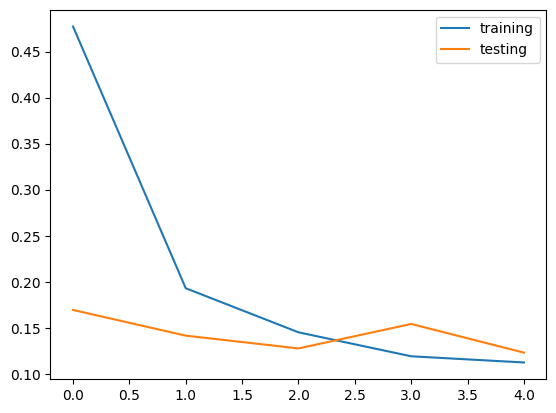

In [ ]:
plt.plot(hist['loss'], label = 'training')
plt.plot(hist['val_loss'], label = 'testing')
plt.legend();
# ater 5 epoch loss is still slightly decreasing. So we can increase the epoch number in order to get better result.

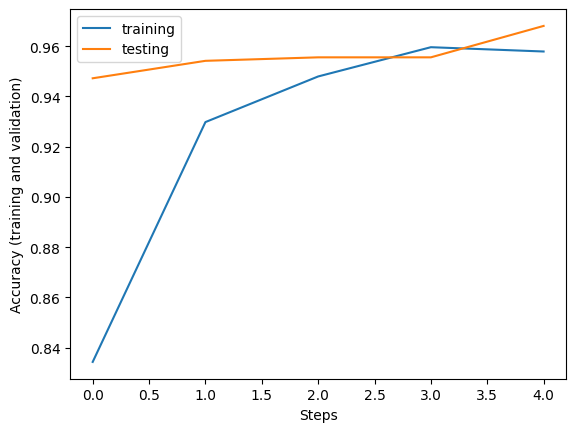

In [ ]:
plt.figure()
plt.ylabel('Accuracy (training and validation)')
plt.xlabel('Steps')
plt.plot(hist['accuracy'], label = 'training')
plt.plot(hist['val_accuracy'], label = 'testing')
plt.legend();
# ater 5 epoch test accuracy is still slightly increasing. So we can increase the epoch number.

# Testing with Images

In [ ]:
X, y = next(iter(test_dataset))

In [ ]:
X

<tf.Tensor: shape=(16, 512, 512, 3), dtype=float32, numpy=
array([[[[4.26710069e-01, 5.30956507e-01, 4.13921177e-01],
         [4.35694337e-01, 5.38497984e-01, 4.20575500e-01],
         [4.44700569e-01, 5.46938002e-01, 4.22896326e-01],
         ...,
         [8.39194059e-01, 7.88656950e-01, 9.29837525e-02],
         [8.22340488e-01, 7.87740290e-01, 1.79242820e-01],
         [7.96492636e-01, 7.80427933e-01, 2.93747813e-01]],

        [[4.34954375e-01, 5.37805617e-01, 4.20736164e-01],
         [4.40843642e-01, 5.43739080e-01, 4.25537527e-01],
         [4.41818535e-01, 5.46022296e-01, 4.22769845e-01],
         ...,
         [8.07516336e-01, 7.63527274e-01, 1.87398136e-01],
         [7.81822383e-01, 7.56612420e-01, 2.96777070e-01],
         [7.50905514e-01, 7.46761918e-01, 4.07431364e-01]],

        [[4.48353022e-01, 5.50019383e-01, 4.29599464e-01],
         [4.50625092e-01, 5.53651690e-01, 4.31976616e-01],
         [4.43939477e-01, 5.49931288e-01, 4.24405277e-01],
         ...,
         [

In [ ]:
X.shape

TensorShape([16, 512, 512, 3])

In [ ]:
y

<tf.Tensor: shape=(16, 5), dtype=float32, numpy=
array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
# First image among 16 images
image = X[0, :, :, :]
image

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.42671007, 0.5309565 , 0.41392118],
        [0.43569434, 0.538498  , 0.4205755 ],
        [0.44470057, 0.546938  , 0.42289633],
        ...,
        [0.83919406, 0.78865695, 0.09298375],
        [0.8223405 , 0.7877403 , 0.17924282],
        [0.79649264, 0.78042793, 0.2937478 ]],

       [[0.43495438, 0.5378056 , 0.42073616],
        [0.44084364, 0.5437391 , 0.42553753],
        [0.44181854, 0.5460223 , 0.42276984],
        ...,
        [0.80751634, 0.7635273 , 0.18739814],
        [0.7818224 , 0.7566124 , 0.29677707],
        [0.7509055 , 0.7467619 , 0.40743136]],

       [[0.44835302, 0.5500194 , 0.42959946],
        [0.4506251 , 0.5536517 , 0.43197662],
        [0.44393948, 0.5499313 , 0.42440528],
        ...,
        [0.76087904, 0.7263162 , 0.2951745 ],
        [0.72554815, 0.71332526, 0.39500406],
        [0.68871003, 0.69949126, 0.4744321 ]],

       ...,

       [[0.30457875, 0.41734183, 0.24301174],
        [0.27

In [ ]:
y_t = y[0]
y_t

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 1., 0.], dtype=float32)>

In [ ]:
y_true = np.argmax(y_t) # position of max num in array
y_true

3

In [ ]:
classes[2]

'roses'

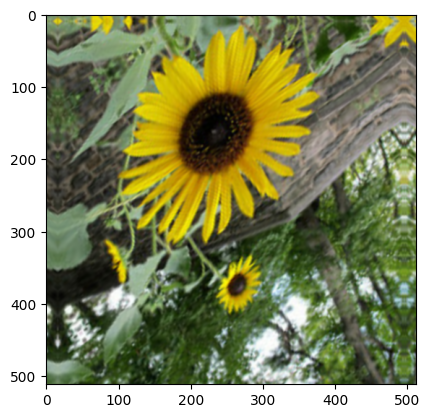

In [ ]:
plt.imshow(image)

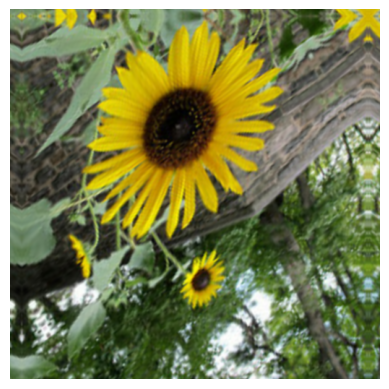

In [ ]:
plt.imshow(image)
plt.axis('off');

In [ ]:
image.shape

TensorShape([512, 512, 3])

In [ ]:
image = np.expand_dims(image, axis = 0)
image.shape

(1, 512, 512, 3)

In [ ]:
prediction = model.predict(image)
prediction

1/1 [==============================] - 6s 6s/step


array([[-5.7520137, -4.697969 , -6.274306 ,  9.497221 , -4.917928 ]],
      dtype=float32)

In [ ]:
prediction = np.argmax(prediction)
prediction

3

In [ ]:
model.save('/content/model')

In [ ]:
loaded_model = tf.keras.models.load_model('/content/model')

In [ ]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              207615832 
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 207622237 (792.02 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 207615832 (791.99 MB)
_________________________________________________________________


In [ ]:
prediction = classes[np.argmax(loaded_model.predict(image))]
prediction

1/1 [==============================] - 6s 6s/step


'sunflowers'